<a href="https://colab.research.google.com/github/FranziskoB/7DaysOfCode-Ciencia-de-Dados/blob/main/3%C2%B0_dia_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

### Descrição do dataset
Cota para Exercício da Atividade Parlamentar dos Senadores:

A Cota para o Exercício da Atividade Parlamentar é uma verba indenizatória à qual os 513 deputados federais e os 81 senadores têm direito para custear as despesas do mandato, com passagens aéreas, telefonia, manutenção de escritórios parlamentares, alimentação, hospedagem, locação de veículos, segurança, divulgação da atividade parlamentar e combustíveis.


##Desafio

Criar um modelo que irá prever quanto os senadores vão gastar nos próximos três meses.

### Importação das bibliotecas

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd
from prophet import Prophet# importa o modelo
from sklearn.datasets import load_boston # para carregar os dados 
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

### Importação dos dados tratados

In [2]:
dados=pd.read_csv('https://raw.githubusercontent.com/FranziskoB/7DaysOfCode-Ciencia-de-Dados/main/Dados/dataset_ceaps_forecasting.csv')
dados.ds= pd.to_datetime(dados.ds)

In [3]:
dados.head(5)

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32


In [4]:
fig = px.line(dados, x="ds", y="y", title='Gasto diário das Cotas para Exercício da Atividade Parlamentar')
fig.show()


Separando os dados de treino e teste

In [5]:
treino = dados[1:len(dados)-90] 
teste = dados[len(dados)-90:]

## Primeiro modelo: Facebook Prophet

In [ ]:
m = Prophet() # Definindo o modelo
m.fit(treino) # Realizando o ajuste dos dados

In [7]:
y_predicted = m.make_future_dataframe(periods=90) # Previsão
forecast = m.predict(y_predicted)

In [8]:
rmse = sqrt(mean_squared_error(teste.y, forecast.yhat.tail(90))) # Aplicando a métrica Raiz Quadrada do Erro Quadrático Médio para avaliar o modelo
rmse

50530.141814472656

In [9]:
forecast.set_index('ds', inplace=True)
teste.set_index('ds', inplace=True)
treino.set_index('ds', inplace=True)

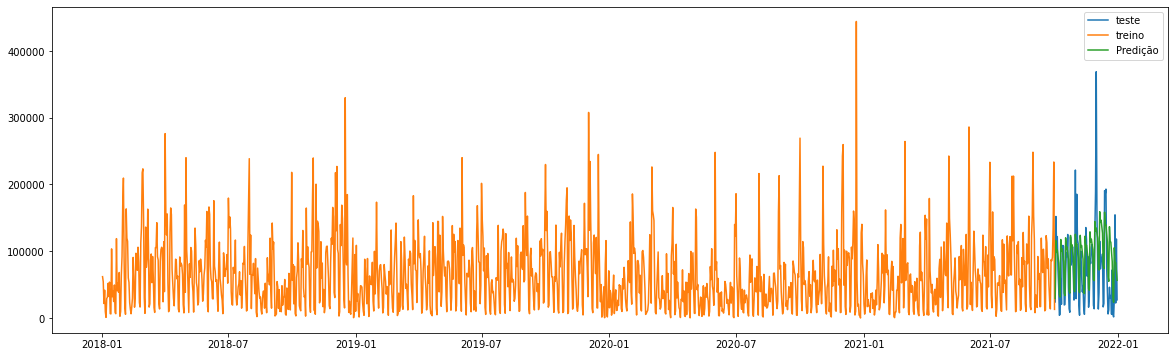

In [10]:
plt.figure(figsize=(20, 6))
plt.plot(teste.y)
plt.plot(treino.y)
plt.plot(forecast.yhat.tail(90))
plt.legend(['teste', 'treino','Predição'])  # Plotando o teste,treino e predição do modelo

## Segundo modelo: SARIMA

In [ ]:
model = auto_arima(y = treino.y,
                   m = 7)
predictions = pd.Series(model.predict(n_periods = len(teste)))
predictions.index = teste.index

In [12]:
rmse = sqrt(mean_squared_error(teste.y, predictions)) # Aplicando a métrica Raiz Quadrada do Erro Quadrático Médio para avaliar o modelo
rmse

53472.95637462387

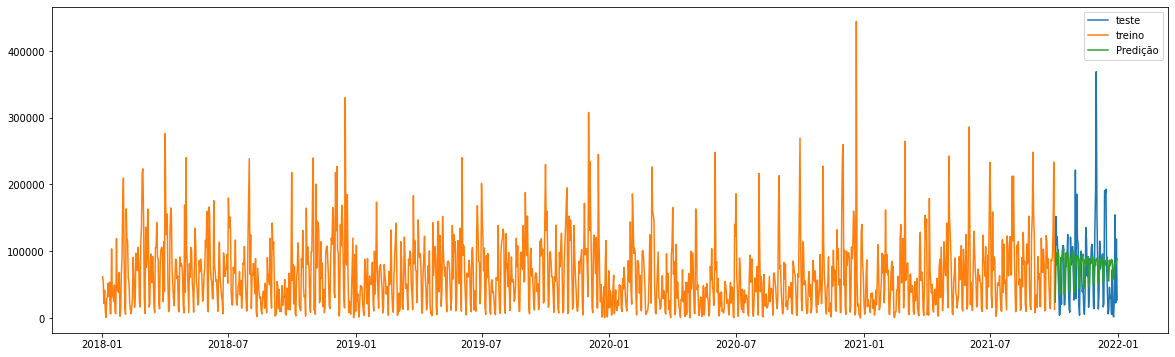

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(teste.y)
plt.plot(treino.y)
plt.plot(predictions)
plt.legend(['teste', 'treino','Predição'])  # Plotando o teste,treino e predição do modelo

##Conclusão

O primeiro modelo apresentou o melhor resultado portando vai ser utilizado para cálcular a previsão de gastos para os proximos 3 meses.

In [ ]:
m = Prophet() # Definindo o modelo
m.fit(dados) # Realizando o ajuste dos dados
y_predicted = m.make_future_dataframe(periods=90) # Previsão
forecast = m.predict(y_predicted)

In [21]:
print("A previsão de gastos para os próximos 3 meses é de: R$", forecast.yhat.tail(90).sum().round(2))

A previsão de gastos para os próximos 3 meses é de: R$ 5963598.84
